In [1]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
np.seterr(divide='ignore', invalid='ignore');
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('default')
import scipy.stats as stats
from astropy.table import Table, Column, MaskedColumn, join
from tqdm import tqdm
c = 2.998e10
k = 1.38e-16
h = 6.626e-27
plt.rcParams.update({'font.size': 22})
halpha = 6564.61
hbeta = 4862.68
hgamma = 4341.68
hdelta = 4102.89
plt.rcParams['figure.figsize'] = [15, 10]
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
import lmfit
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
import emcee
from lmfit import Model,Minimizer
import corner
import numdifftools
from scipy.ndimage.interpolation import shift
import pickle

In [2]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,scale,MinMaxScaler,StandardScaler

Using TensorFlow backend.


In [3]:
arr = pickle.load(open('modelspecs.p','rb'))
modelspectra = arr[0]
teffs = arr[2]
loggs = arr[1]

In [4]:
def v_mse(y_true, y_pred):
    return K.mean((1e5*y_pred - 1e5*y_true )**2)

def labelscaler(array):
    array[:,0] = array[:,0] / 80000
    array[:,1] = array[:,1] / 9.5
    return array

def labelunscaler(array):
    array[:,0] = array[:,0] * 80000
    array[:,1] = array[:,1] * 9.5
    return array

In [6]:
X = labelscaler(np.stack((teffs,loggs)).transpose())

t = (modelspectra/np.max(modelspectra))

modelscaling = np.max(modelspectra)

In [7]:
def generator():
    model = Sequential()
    
    model.add(Dense(2,input_shape=X[0].shape))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(4000,activation='sigmoid'))
    model.compile(optimizer = Adam(lr=1e-3), loss = v_mse, \
                  metrics = ['mean_absolute_percentage_error'])
    return model

In [9]:
model = generator()
model.load_weights('generator100_1024.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3072      
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 4000)              4100000   
Total params: 5,152,678
Trainable params: 5,152,678
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
epoch = 200
batch = 32

history = model.fit(X,t,epochs=epoch,verbose=2,batch_size=batch)

W0725 17:24:02.545054 47307748472128 deprecation.py:323] From /home-4/vchandr8@jhu.edu/anaconda/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
 - 1s - loss: 18862.6505 - mean_absolute_percentage_error: 3.0483
Epoch 2/200
 - 1s - loss: 593.9585 - mean_absolute_percentage_error: 0.7218
Epoch 3/200
 - 1s - loss: 204.9501 - mean_absolute_percentage_error: 0.4647
Epoch 4/200
 - 1s - loss: 179.5711 - mean_absolute_percentage_error: 0.4473
Epoch 5/200
 - 1s - loss: 185.6234 - mean_absolute_percentage_error: 0.4686
Epoch 6/200
 - 1s - loss: 192.4883 - mean_absolute_percentage_error: 0.4490
Epoch 7/200
 - 1s - loss: 195.0859 - mean_absolute_percentage_error: 0.4420
Epoch 8/200
 - 1s - loss: 184.6539 - mean_absolute_percentage_error: 0.4493
Epoch 9/200
 - 1s - loss: 204.4424 - mean_absolute_percentage_error: 0.4770
Epoch 10/200
 - 1s - loss: 192.1772 - mean_absolute_percentage_error: 0.4645
Epoch 11/200
 - 1s - loss: 193.1054 - mean_absolute_percentage_error: 0.4556
Epoch 12/200
 - 1s - loss: 191.6560 - mean_absolute_percentage_error: 0.4570
Epoch 13/200
 - 1s - loss: 234.2707 - mean_absolute_percentage_error: 0.4709
Epoch 

 - 1s - loss: 486.9362 - mean_absolute_percentage_error: 0.7333
Epoch 108/200
 - 1s - loss: 300.3257 - mean_absolute_percentage_error: 0.5744
Epoch 109/200
 - 1s - loss: 253.5495 - mean_absolute_percentage_error: 0.5254
Epoch 110/200
 - 1s - loss: 224.1065 - mean_absolute_percentage_error: 0.4719
Epoch 111/200
 - 1s - loss: 207.9850 - mean_absolute_percentage_error: 0.4616
Epoch 112/200
 - 1s - loss: 246.0990 - mean_absolute_percentage_error: 0.4842
Epoch 113/200
 - 1s - loss: 327.5181 - mean_absolute_percentage_error: 0.5331
Epoch 114/200
 - 1s - loss: 233.9251 - mean_absolute_percentage_error: 0.4889
Epoch 115/200
 - 1s - loss: 243.3361 - mean_absolute_percentage_error: 0.5080
Epoch 116/200
 - 1s - loss: 286.5944 - mean_absolute_percentage_error: 0.5078
Epoch 117/200
 - 1s - loss: 247.3922 - mean_absolute_percentage_error: 0.5125
Epoch 118/200
 - 1s - loss: 199.3745 - mean_absolute_percentage_error: 0.4608
Epoch 119/200
 - 1s - loss: 366.6510 - mean_absolute_percentage_error: 0.5471


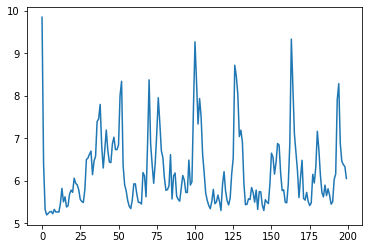

In [11]:
plt.plot(np.log(history.history['loss']))

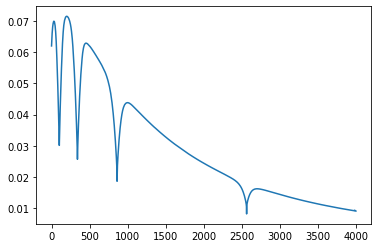

In [12]:
plt.plot( np.ravel(model.predict(labelscaler(np.asarray([15000,8.]).reshape(1,-1)))) )

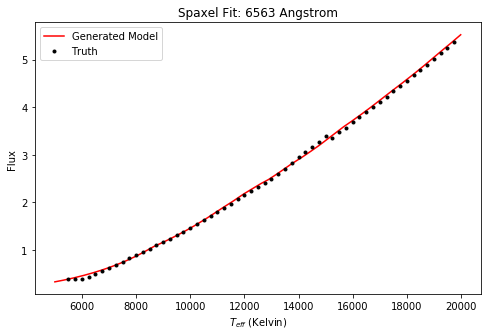

In [13]:
ts = np.arange(5000,20000,10)
#ls = np.linspace(6.5,9.5,50)
lmask = (loggs == 8)*(teffs < 20000)
mods = []

for i in ts:
    mods.append(model.predict(labelscaler(np.asarray([i,8.]).reshape(1, -1))))
mods = np.asarray(mods)

plt.figure(figsize = (8,5))
pixel = 2563
plt.plot(ts,mods[:,0,pixel]*modelscaling,'r',label='Generated Model')
plt.plot(teffs[lmask],modelspectra[:,pixel][lmask],'k.',label='Truth')
plt.title('Spaxel Fit: %i Angstrom'%(pixel+4000))
plt.xlabel('$T_{eff}$ (Kelvin)')
plt.ylabel('Flux')
plt.legend()

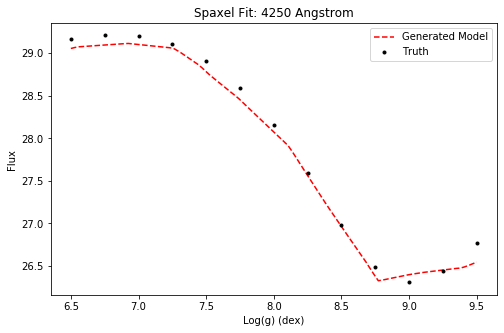

In [14]:
ls = np.linspace(6.5,9.5,100)

tmask = (teffs == 15000)
mods = []

for i in ls:
    mods.append(model.predict(labelscaler(np.asarray([15000,i]).reshape(1, -1))))
mods = np.asarray(mods)

plt.figure(figsize = (8,5))
pixel = 250
plt.plot(ls,mods[:,0,pixel]*modelscaling,'r--',label='Generated Model')
plt.plot(loggs[tmask],modelspectra[:,pixel][tmask],'k.',label='Truth')
plt.title('Spaxel Fit: %i Angstrom'%(pixel+4000))
plt.xlabel('Log(g) (dex)')
plt.ylabel('Flux')
plt.legend()

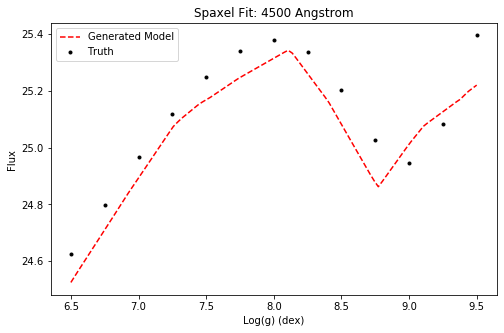

In [15]:
ls = np.linspace(6.5,9.5,100)

tmask = (teffs == 15000)
mods = []

for i in ls:
    mods.append(model.predict(labelscaler(np.asarray([15000,i]).reshape(1, -1))))
mods = np.asarray(mods)

plt.figure(figsize = (8,5))
pixel = 500
plt.plot(ls,mods[:,0,pixel]*modelscaling,'r--',label='Generated Model')
plt.plot(loggs[tmask],modelspectra[:,pixel][tmask],'k.',label='Truth')
plt.title('Spaxel Fit: %i Angstrom'%(pixel+4000))
plt.xlabel('Log(g) (dex)')
plt.ylabel('Flux')
plt.legend()

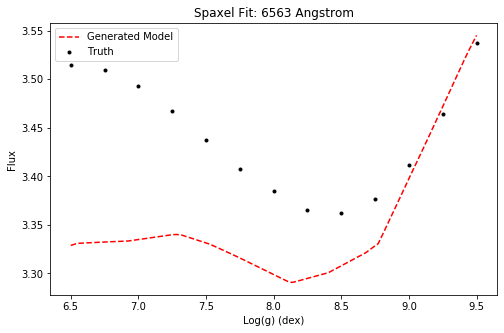

In [16]:
ls = np.linspace(6.5,9.5,100)

tmask = (teffs == 15000)
mods = []

for i in ls:
    mods.append(model.predict(labelscaler(np.asarray([15000,i]).reshape(1, -1))))
mods = np.asarray(mods)

plt.figure(figsize = (8,5))
pixel = 2563
plt.plot(ls,mods[:,0,pixel]*modelscaling,'r--',label='Generated Model')
plt.plot(loggs[tmask],modelspectra[:,pixel][tmask],'k.',label='Truth')
plt.title('Spaxel Fit: %i Angstrom'%(pixel+4000))
plt.xlabel('Log(g) (dex)')
plt.ylabel('Flux')
plt.legend()

In [60]:
preds = model.predict(X)

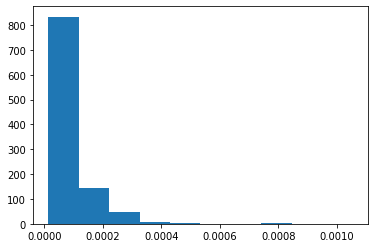

In [70]:
plt.hist((np.sqrt(np.mean((preds-t)**2,axis=1))));

In [185]:
model.save_weights('generator100_1024.h5')

In [19]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2513531416673528214
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6720802363262763369
physical_device_desc: "device: XLA_CPU device"
]


In [18]:
%%bash

sqme

Thu Jul 25 18:12:57 2019
              USER        JOBID PARTITION      NAME NODES  CPUS PRIORITY TIME_LIMIT     TIME        NODELIST ST REASON 
  vchandr8@jhu.edu     35598500 express    jupyter_     1     6    38593   10:00:00    50:33     compute0716 R None 


In [17]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [23]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version

In [19]:
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config)

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'